<a href="https://colab.research.google.com/github/VeronikaShe/ML-study/blob/main/Draft%20%D0%B4%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Модель логистической регрессии
<p id="3">Классификации физических лиц по уровню дохода.</p>

In [6]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов

In [74]:
# датасет
data = pd.read_csv('https://raw.githubusercontent.com/VeronikaShe/ML-study/refs/heads/main/adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [76]:
data.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
educational-num,0
marital-status,0
occupation,0
relationship,0
race,0
gender,0


#### <p style="align: center;">Шаг 1 Предобработка данных.


In [77]:
data = data[['age','workclass', 'educational-num', 'occupation', 'gender', 'hours-per-week', 'race','income']]

In [22]:
X = data.drop(columns=['income'])

In [78]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data['income'])
y = le.transform(data['income'])
le.fit(data['occupation'])
z = le.transform(data['occupation'])
le.fit(data['race'])
t = le.transform(data['race'])

a1, a2 = np.unique((data['educational-num']+3)*y, return_counts=True)
a11, a12 = np.unique((data['educational-num']+3)*(1-y), return_counts=True)


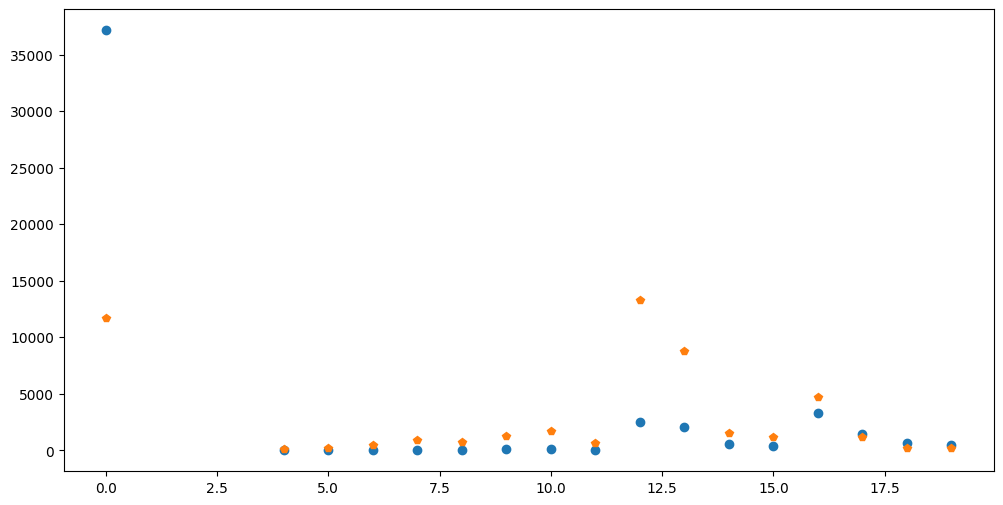

In [56]:
plt.figure(figsize=(12,6))
plt.plot(a1, a2, 'o')
plt.plot(a11, a12, 'p')
plt.show()

In [79]:
b1, b2 = np.unique((t+1)*y, return_counts=True)
b11, b12 = np.unique((t+1)*(1-y), return_counts=True)

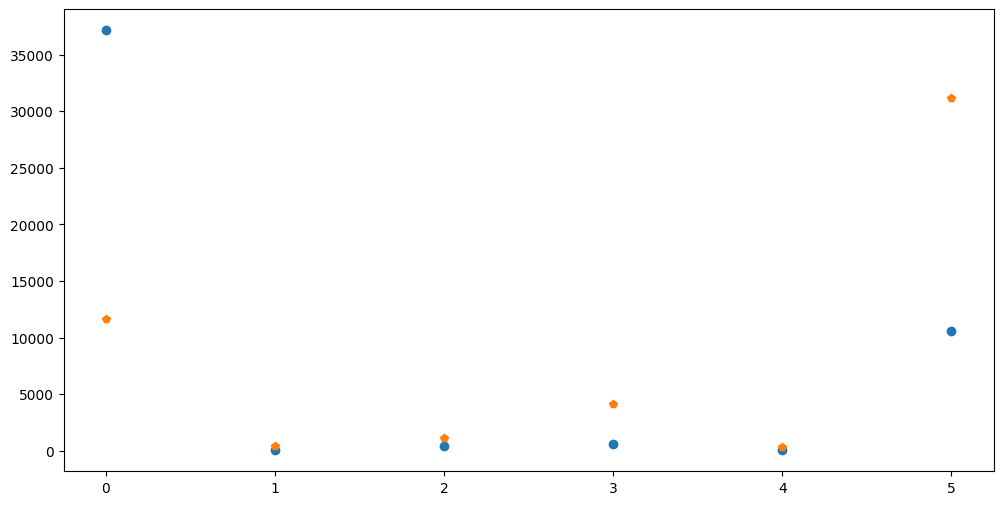

In [80]:
plt.figure(figsize=(12,6))
plt.plot(b1, b2, 'o')
plt.plot(b11, b12, 'p')
plt.show()

Типы данных https://youtu.be/c4Cg3TUIH0E


In [23]:
X.head()

,age,workclass,educational-num,occupation,gender,hours-per-week
0,25,Private,7,Machine-op-inspct,Male,40
1,38,Private,9,Farming-fishing,Male,50
2,28,Local-gov,12,Protective-serv,Male,40
3,44,Private,10,Machine-op-inspct,Male,40
4,18,?,10,?,Female,30


<p>LabelEncoder ставит в соответствие значению пола (женщина, мужчина) 0 и 1 </p>

In [ ]:
# целевая переменная (столбец sex) снова является категориальной
# переведем значения столбца в числа, оставив один столбец

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
le.fit(data['sex'])

LabelEncoder()

In [ ]:
le.classes_

array(['female', 'male'], dtype=object)

In [ ]:
le.transform(['male', 'female', 'male']) # пример расшифровки

array([1, 0, 1])

In [ ]:
le.inverse_transform([1, 0, 1])

array(['male', 'female', 'male'], dtype=object)

In [ ]:
# записываем в таргетную переменную y преобразованный столбец sex

y = pd.Series(data=le.transform(data['sex']))
y.head()

,0
0,1
1,0
2,1
3,1
4,1


<div class="alert alert-info"><p> Далее используем популярную библиотеку <b>scikit-learn</b> для классического машинного обучения. Для дополнительного изучения всю документацию можете найти на <a href="https://scikit-learn.org/stable/">сайте</a>. Она умеет довольно неплохо решать множество задач машинного обучения, но чаще всего испольузется для обучения, а не для конкретных задач.</p></div>

In [ ]:
from sklearn.linear_model import LogisticRegression
# LogisticRegression классификация
# LinearRegression регрессия

In [ ]:
from sklearn.model_selection import train_test_split

model = LogisticRegression()

#### Шаг 2 Обучение.


 Поделим данные на обучающую выборку и тестовую. Указываем в test_size долю датасета, которая пойдет на тестовую выбору

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test.index

Index([  36, 7675, 9226, 6362, 7489, 6263,  742, 9503, 7130, 8835,
       ...
       4140, 3530, 4395, 1512, 5240,  648, 1354, 5099, 8195, 6590],
      dtype='int64', length=3258)

In [ ]:
# обучаем на части датасета (train)

model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
predictions[:5] # посмотрим как выглядят наши предсказания

array([1, 1, 0, 1, 1])

In [ ]:
model.predict(X_test) # получаем массив

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
model.predict_proba(X_test)

array([[0.4117101 , 0.5882899 ],
       [0.03232859, 0.96767141],
       [0.84235544, 0.15764456],
       ...,
       [0.79560048, 0.20439952],
       [0.67654192, 0.32345808],
       [0.95919353, 0.04080647]])

Метрика accuracy https://youtu.be/CCH-1gJo_z0


<p>Получаем наш скор (точность предсказания) на обучающей и тестовой выборках.</p>

In [ ]:
model.score(X_train, y_train)

0.77

In [ ]:
model.score(X_test, y_test)

0.785451197053407